<a href="https://colab.research.google.com/github/LucasDatilioCarderelli/Codenation/blob/master/enem-2/main_enem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# enem-2

## Importing

Importando as bibliotecas e carregando os dados.

In [ ]:
# Manipulaão de dados
import pandas as pd
import numpy as np

# Lib para gerar gráficos
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

# Biblioteca para aprendizagem de máquina
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

from google.colab import files # Lib do colab para baixar os dados de saida

In [ ]:
!pip install tpot #Instalando uma biblioteca de AutomMl no notebook
from tpot import TPOTRegressor

     |████████████████████████████████| 92kB 2.4MB/s 
     |████████████████████████████████| 163kB 8.7MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=2f74ef19f0ea49fb0bcaf53fd99b96b52fcf18eae977ecc9df4314f3f404aabf
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [ ]:
# Lendo os dados de treino e de teste
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

train.shape, test.shape

((13730, 167), (4576, 47))

## Droping and Filling

Descartano colunas e preenchando valores nulos

In [ ]:
train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1,1,1,1,1,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,5,5,5,5,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.0,0.0,5.0,5.0,5.0,5,5,5,5,2,5,5,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.0,4.0,3.0,5.0,4.0,5,5,4,3,1,4,5,NaN,A,A,A,A,A,A,A,A,A


In [ ]:
test.drop(labels=['CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 
                  'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
           axis=1, inplace=True)

In [ ]:
nota_mt = train.NU_NOTA_MT
nota_mt.shape

(13730,)

In [ ]:
train = train[test.columns].join(nota_mt)
train.shape, test.shape

((13730, 36), (4576, 35))

* O conjunto de teste tem colunas de menos, logo utiliza as mesmas colunas nos dados de treino mais a coluna alvo

In [ ]:
test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0


In [ ]:
train_inscrição = train.pop("NU_INSCRICAO")
test_inscrição = test.pop("NU_INSCRICAO")

In [ ]:
train.isnull().sum() # Visualizando os nulos

CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 9448
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    9448
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
NU_NOTA_CN                3389
NU_NOTA_CH                3389
NU_NOTA_LC                3597
TP_LINGUA                    0
TP_STATUS_REDACAO         3597
NU_NOTA_COMP1             3597
NU_NOTA_COMP2             3597
NU_NOTA_COMP3             3597
NU_NOTA_COMP4             3597
NU_NOTA_

In [ ]:
# Imputando dados pela mediana
print(train.TP_ENSINO.median(), train.TP_DEPENDENCIA_ADM_ESC.median())
train.TP_ENSINO.fillna(1, inplace=True)
train.TP_DEPENDENCIA_ADM_ESC.fillna(2, inplace=True)
test.TP_ENSINO.fillna(1, inplace=True)
test.TP_DEPENDENCIA_ADM_ESC.fillna(2, inplace=True)

1.0 2.0


In [ ]:
# Imputando com zeros
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

## Modeling

In [ ]:
# Transformando variaveis categoricas em númericas
train = pd.get_dummies(train)
test= pd.get_dummies(test)

In [ ]:
# Definindo a variavel alvo e separando os dados de treino em treino e validação
x = train.drop("NU_NOTA_MT", axis=1)
y = train["NU_NOTA_MT"]

xtrain, xval, ytrain, yval = train_test_split(x, y, test_size=.3, random_state=0)
xtrain.shape, xval.shape, ytrain.shape, yval.shape

((9611, 61), (4119, 61), (9611,), (4119,))

In [ ]:
ytrain = ytrain.to_numpy().reshape(-1,1)

### Treinando os modelos

In [ ]:
mdl = LinearRegression(normalize=True)
mdl.fit(xtrain, ytrain)
p = mdl.predict(xval)
s = r2_score(yval, p)
s #0.9142450356466628 normalize=False

0.9109671789900765

In [ ]:
mdl_ridge = Ridge().fit(xtrain, ytrain)
p_ridge = mdl_ridge.predict(xval)
r2_score(yval, p_ridge)

0.9109833060859229

In [ ]:
mdl_lasso = Lasso().fit(xtrain, ytrain)
p_lasso = mdl_lasso.predict(xval)
r2_score(yval, p_lasso)

0.9047063592812215

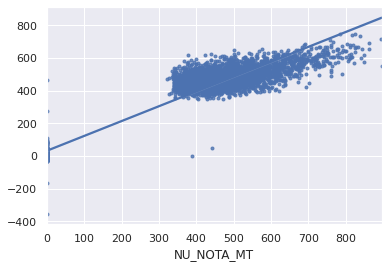

In [ ]:
sns.regplot(x=yval, y=p, marker="."); # Gerando o gráfico de erros do modelo com r²

In [ ]:
pred = mdl.predict(test) # Predizendo nos dados de teste

### Pós-Processamento

In [ ]:
for n in range(0, len(pred)):
  if pred[n] < 300:
    pred[n] = 0
pred = np.round(pred, 1)
pred

array([[433.3],
       [444.5],
       [562.6],
       ...,
       [618.6],
       [483.1],
       [  0. ]])

## AutoMl

Atomatizando o treinamento do modelo

In [ ]:
tp = TPOTRegressor(generations=10, verbosity=2, scoring="r2")

tp.fit(xtrain, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Generation 1 - Current best internal CV score: 0.9243868231462574
Generation 2 - Current best internal CV score: 0.924443054461598
Generation 3 - Current best internal CV score: 0.9246222333669094
Generation 4 - Current best internal CV score: 0.9246990211233698
Generation 5 - Current best internal CV score: 0.9246990211233698
Generation 6 - Current best internal CV score: 0.9246990211233698
Generation 7 - Current best internal CV score: 0.9249426271597191
Generation 8 - Current best internal CV score: 0.9249544395273969
Generation 9 - Current best internal CV score: 0.9251158565183039

TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesRegressor(CombineDFs(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), input_matrix), bootstrap=True, max_features=0.6500000000000001, min_samples_leaf=13, min_samples_split=7, n_estimators=100)


TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
              disable_update_check=False, early_stop=None, generations=10,
              log_file=<ipykernel.iostream.OutStream object at 0x7ff26278f588>,
              max_eval_time_mins=5, max_time_mins=None, memory=None,
              mutation_rate=0.9, n_jobs=1, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=100,
              random_state=None, scoring='r2', subsample=1.0, template=None,
              use_dask=False, verbosity=2, warm_start=False)

In [ ]:
print(tp.score(xval, yval))

0.9241952215983558


In [ ]:
tp.export('tpot_pipeline.py') # Exportando as intruções do modelo

In [ ]:
# Aplicando o modelo gerado pela automatização
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures
from tpot.builtins import StackingEstimator
from sklearn.preprocessing import FunctionTransformer
from copy import copy

training_features, testing_features, training_target, testing_target = \
            train_test_split(x, y, test_size=.3, random_state=None)

# Average CV score on the training set was: 0.9251158565183039
exported_pipeline = make_pipeline(
    make_union(
        PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
        FunctionTransformer(copy)
    ),
    ExtraTreesRegressor(bootstrap=True, max_features=0.65, min_samples_leaf=13, 
                        min_samples_split=7, n_estimators=100)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

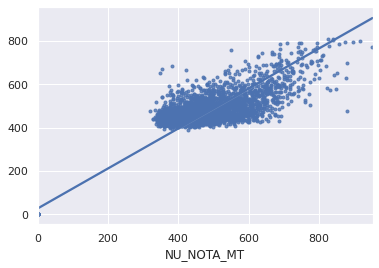

In [ ]:
sns.regplot(x=testing_target, y=results, marker='.');

In [ ]:
results_test = exported_pipeline.predict(test)

In [ ]:
# Colocando todos os valores abaio de 300 em 0. 300 é a nota minina no enem caso preenchido
for n in range(0, len(results_test)):
  if results_test[n] < 300:
    results_test[n] = 0
results_test = results_test.round(1)

## Saving

Salando e gerando o arquivo com a resposta da predição

In [ ]:
resp = pd.DataFrame(results_test, index=test_inscrição)
resp.columns = ['NU_NOTA_MT']
resp

,NU_NOTA_MT
NU_INSCRICAO,
73ff9fcc02f0a99919906c942c2e1a1042cdcf98,421.1
71a95f9f1b91a82c65ad94abbdf9f54e6066f968,435.6
b38a03232f43b11c9d0788abaf060f7366053b6d,595.5
70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.0
715494628a50142ce8cb17191cfe6d0f3cae0934,543.6
...,...
dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,454.4
a75fa8770257e7c9368d059fe53d9ef431f4bdef,479.9
655fa6306720ff16e825903b5422a46608a77545,699.1


In [ ]:
resp.to_csv('answer.csv')
files.download('answer.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Results
Tentativas e resultados obtidos

* 1º: 93.112414% padrão
* 2º: 93.383744% round 0
* 3º: 93.383173% round 1
* 4º: 93.734969% automl